# Przeprowadzenie testów odnośnie rozmiarów:
okna poolingu i **typu poolingu**

In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-22 14:46:14.939529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 14:46:15.312150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 14:46:15.312186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-22 14:46:15.360843: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 14:46:16.179598: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_type"
for pooling in [layers.MaxPooling2D, layers.AveragePooling2D]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation=ACT_RELU),
        pooling(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
all_titles.append("MaxPooling2D")
all_titles.append("AveragePooling2D")
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      16      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n              type filters kernel_size activation pool_size strides units
 1  0       KerasTensor                                                       
 2  1            Conv2D      16      (3, 3)       relu                        
 3  2  AveragePooling2D                                   (2, 2)  (1, 1)      
 4  3           Flatten                                                       
 5  4             Dense                                                     10]

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy", TP, TN, FP, FN])

In [5]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2963 - accuracy: 0.9133 - true_positives: 52964.0000 - true_negatives: 536978.0000 - false_positives: 3022.0000 - false_negatives: 7036.0000 - val_loss: 0.1421 - val_accuracy: 0.9552 - val_true_positives: 9481.0000 - val_true_negatives: 89664.0000 - val_false_positives: 336.0000 - val_false_negatives: 519.0000
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1043 - accuracy: 0.9698 - true_positives: 57906.0000 - true_negatives: 538616.0000 - false_positives: 1384.0000 - false_negatives: 2094.0000 - val_loss: 0.0795 - val_accuracy: 0.9759 - val_true_positives: 9728.0000 - val_true_negatives: 89810.0000 - val_false_positives: 190.0000 - val_false_negatives: 272.0000
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0705 - accuracy: 0.9798 - true_positives: 58644.0000 - true_negatives: 538984.0000 - false_positives: 1016.0000 - false_negatives: 1356.0000 - val_l

 50%|█████     | 1/2 [00:41<00:41, 41.89s/it]

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.3017 - accuracy: 0.9179 - true_positives: 62346.0000 - true_negatives: 627129.0000 - false_positives: 2871.0000 - false_negatives: 7654.0000 - val_loss: 0.1350 - val_accuracy: 0.9618 - val_true_positives: 9552.0000 - val_true_negatives: 89698.0000 - val_false_positives: 302.0000 - val_false_negatives: 448.0000
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1142 - accuracy: 0.9680 - true_positives: 57733.0000 - true_negatives: 538521.0000 - false_positives: 1479.0000 - false_negatives: 2267.0000 - val_loss: 0.0832 - val_accuracy: 0.9756 - val_true_positives: 9728.0000 - val_true_negatives: 89803.0000 - val_false_positives: 197.0000 - val_false_negatives: 272.0000
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0793 - accuracy: 0.9773 - true_positives: 58427.0000 - true_negatives: 538894.0000 - false_positives: 1106.0000 - false_negatives: 1573.0000 - val_l

100%|██████████| 2/2 [01:15<00:00, 37.60s/it]


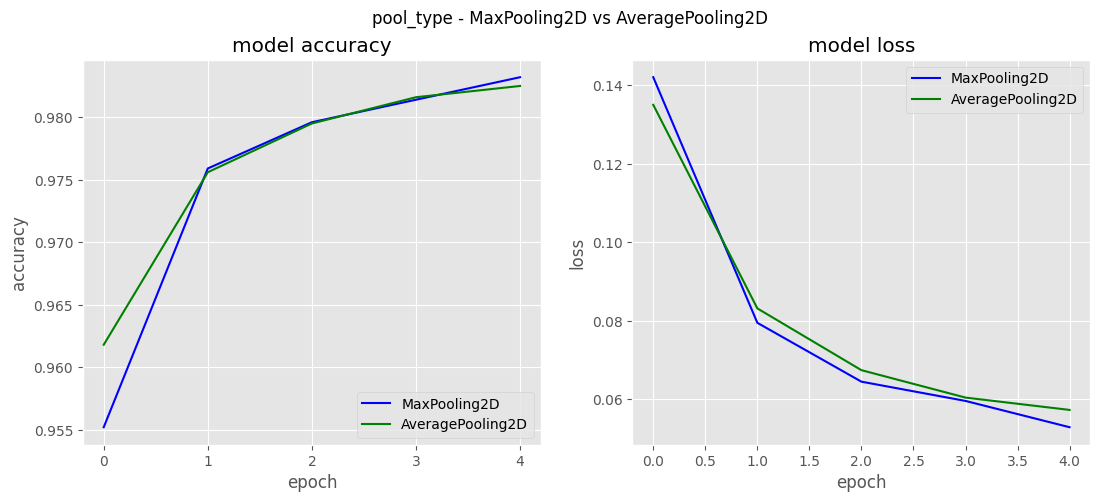

In [6]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)

/tmp/ipykernel_16678/2175260309.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


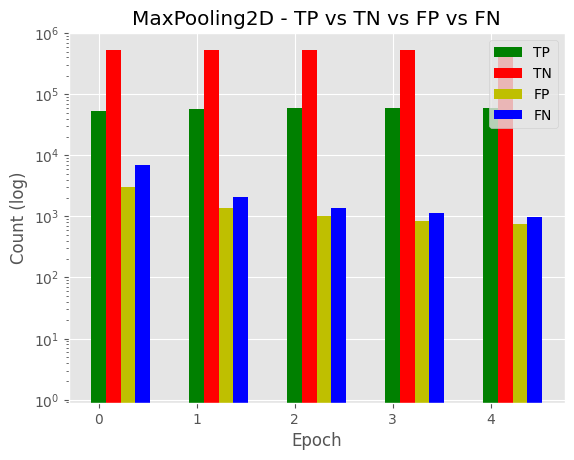

/tmp/ipykernel_16678/2175260309.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


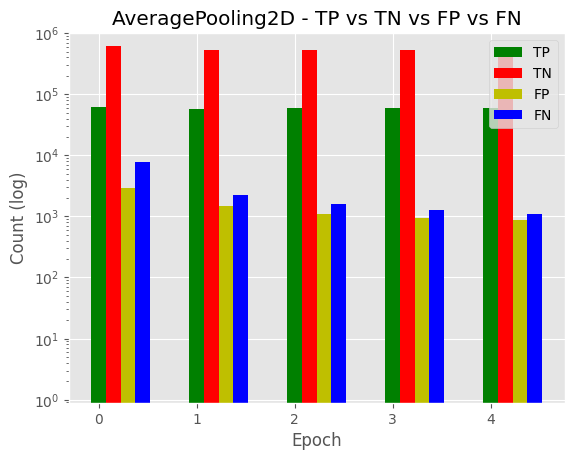

In [14]:
import numpy as np
for i, h in enumerate(all_history):
    plt.style.use('ggplot')
    _, ax = plt.subplots()
    ax.set_yscale("log")
    plt.ylim(0, 1e6)
    ind = np.arange(len(h.history["true_negatives"]))
    width = 0.15
    ax.set_title(all_titles[i] + " - TP vs TN vs FP vs FN")
    ax.bar(ind, np.array(h.history["true_positives"]), width, label="TP", color="g")
    ax.bar(ind+width, np.array(h.history["true_negatives"]), width, label="TN", color="r")
    ax.bar(ind+(width*2), np.array(h.history["false_positives"]), width, label="FP", color="y")
    ax.bar(ind+(width*3), np.array(h.history["false_negatives"]), width, label="FN", color="b")
    ax.legend()
    ax.set_ylabel('Count (log)')
    ax.set_xlabel('Epoch')
    ax.set_xticks(ind)
    plt.show()